# PyHRM - High Resolution Melt Analysis in Python

## Introduction

**Hosted at https://github.com/liuyigh/PyHRM **

Please read a very nice introduction provided by Kapa BioSystems to understand, prepare and troubleshoot


### Import Python modules for analysis

In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read and Plot Melting Data

Go to [GitHub](https://github.com/liuyigh/PyHRM) to view the format of data file. Basically, it's a CSV file exported from CFX manager data analysis melting curve data "RFU" table (Right click to export to CSV). Open with Excel, delet the empty column. First column "Temperature", each of following columns represent a sample well.

In [25]:
df = pd.read_csv('melt.csv')
print(df)


     Temperature           A3           B3           C3           D3  \
0           65.0  3377.959715  3904.443007  4156.504114  4161.425378   
1           65.1  3393.772427  3951.561637  4211.217894  4214.392032   
2           65.2  3409.585139  3998.680268  4265.931673  4267.358685   
3           65.3  3425.397851  4045.798898  4320.645453  4320.325338   
4           65.4  3441.210564  4092.917529  4375.359233  4373.291991   
..           ...          ...          ...          ...          ...   
296         94.6  3113.753340  3109.515248  3148.846897  3200.737597   
297         94.7  3113.098048  3109.464860  3148.727457  3200.116321   
298         94.8  3112.460198  3109.670437  3148.158906  3198.887252   
299         94.9  3112.072613  3110.107796  3147.700485  3197.517349   
300         95.0  3111.305379  3110.432584  3145.908759  3195.086302   

              E3           F3           G3           H3  
0    4386.167338  4608.377686  3287.183451  3173.588585  
1    4448.760461  4

In [26]:
df.iloc[:,1:]

,A3,B3,C3,D3,E3,F3,G3,H3
0,3377.959715,3904.443007,4156.504114,4161.425378,4386.167338,4608.377686,3287.183451,3173.588585
1,3393.772427,3951.561637,4211.217894,4214.392032,4448.760461,4675.315128,3293.411692,3180.375021
2,3409.585139,3998.680268,4265.931673,4267.358685,4511.353584,4742.252570,3299.639932,3187.161456
3,3425.397851,4045.798898,4320.645453,4320.325338,4573.946708,4809.190013,3305.868173,3193.947891
4,3441.210564,4092.917529,4375.359233,4373.291991,4636.539831,4876.127455,3312.096413,3200.734326
...,...,...,...,...,...,...,...,...
296,3113.753340,3109.515248,3148.846897,3200.737597,3130.478274,3175.316256,3161.588093,3094.563223
297,3113.098048,3109.464860,3148.727457,3200.116321,3130.273240,3175.134462,3161.074620,3094.353099
298,3112.460198,3109.670437,3148.158906,3198.887252,3129.736948,3174.985442,3160.750853,3094.285275
299,3112.072613,3110.107796,3147.700485,3197.517349,3129.098930,3175.201540,3160.509327,3094.478063


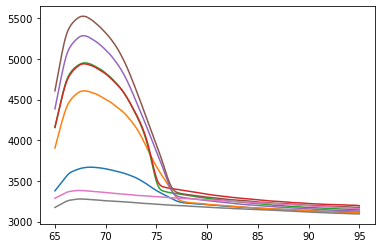

In [27]:
plt.plot(df.iloc[:, 0],df.iloc[:,1:].values)
plt.show()

### Select melting range

Based on the plot above, select a range of temperature.

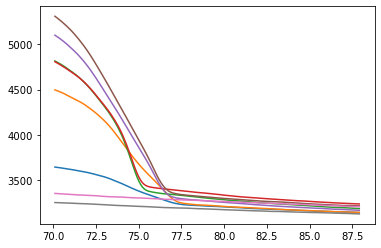

In [28]:
df_melt=df.loc[(df.iloc[:,0]>70) & (df.iloc[:,0]<88)]
df_data=df_melt.iloc[:,1:]
plt.plot(df_melt.iloc[:, 0],df_data.values)
plt.show()

### Normalizing 

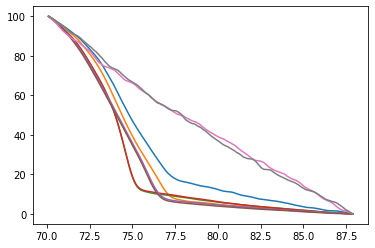

In [29]:
df_norm= (df_data - df_data.min()) / (df_data.max()-df_data.min())*100
plt.plot(df_melt.iloc[:, 0],df_norm.values)
plt.show()

### Melting Temp

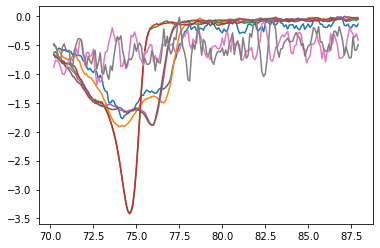

In [30]:
dfdt = df_norm.diff()
plt.plot(df_melt.iloc[:,0],dfdt.values)
plt.show()

dfdtWithTemp = pd.concat([df_melt.iloc[:,[0]],dfdt],axis=1)
meltTempList = dfdtWithTemp.set_index('Temperature').idxmin()

### Calculate and Show Diff Plot 

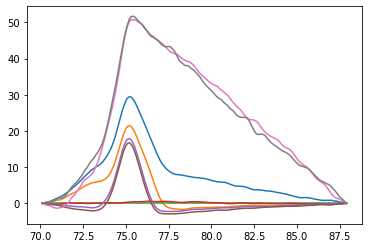

In [31]:
dfdif = df_norm.sub(df_norm['C3'],axis=0)
plt.plot(df_melt.iloc[:, 0],dfdif.values)
plt.show()

### Clustering

Use KMeans module from SciKit-Learn to cluster your sample into three groups (WT, KO, HET). Be careful, your samples may have less than three groups. So always check the diff plots first.

In [32]:
import sklearn.cluster as sc
from IPython.display import display

In [33]:
mat = dfdif.T
hc = sc.KMeans(n_clusters=2)
hc.fit(mat)

labels = hc.labels_
results = pd.DataFrame([dfdif.T.index,labels])
display(results.loc[:0,results.iloc[1]==0])
display(results.loc[:0,results.iloc[1]==1])
display(results.loc[:0,results.iloc[1]==2])

,6,7
0,G3,H3


,0,1,2,3,4,5
0,A3,B3,C3,D3,E3,F3


""
0


My controls are 
* WT: I12, J12
* KO: I13, J13
* HET: I14, J14

So you can identify your genotyping results by looking at: to which control they cluster.